In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [2]:
# import dataset
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

In [4]:
data.shape

(20000, 785)

In [6]:
# extract labels
labels = data[:,0]
data = data[:,1:]

print(labels.shape)
print(data.shape)

(20000,)
(20000, 784)


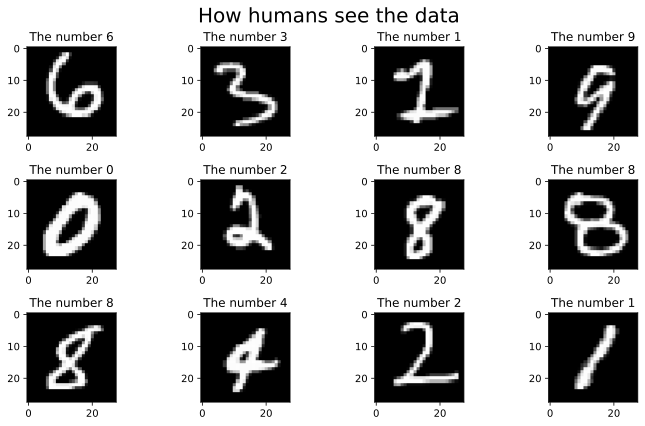

In [8]:
# show a few random digits
fig,axs = plt.subplots(3,4,figsize=(10,6))

for ax in axs.flatten():
    #pick a random image
    randimg2show = np.random.randint(0,high=data.shape[0])

    # image must be reshaped
    img = np.reshape(data[randimg2show,:],(28,28))
    ax.imshow(img,cmap='gray')

    #title
    ax.set_title('The number %i' %labels[randimg2show])
plt.suptitle('How humans see the data',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

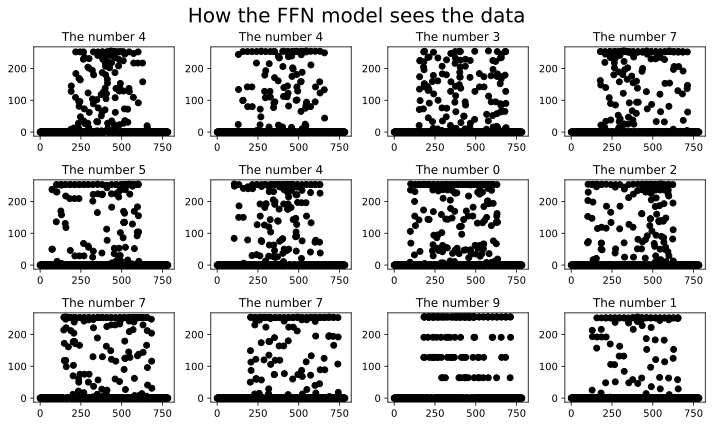

In [9]:
# show a few random digits
fig,axs = plt.subplots(3,4,figsize=(10,6))

for ax in axs.flatten():
  # pick a random image
  randimg2show = np.random.randint(0,high=data.shape[0])

  # create the image
  ax.plot(data[randimg2show,:],'ko')

  # title
  ax.set_title('The number %i'%labels[randimg2show])

plt.suptitle('How the FFN model sees the data',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

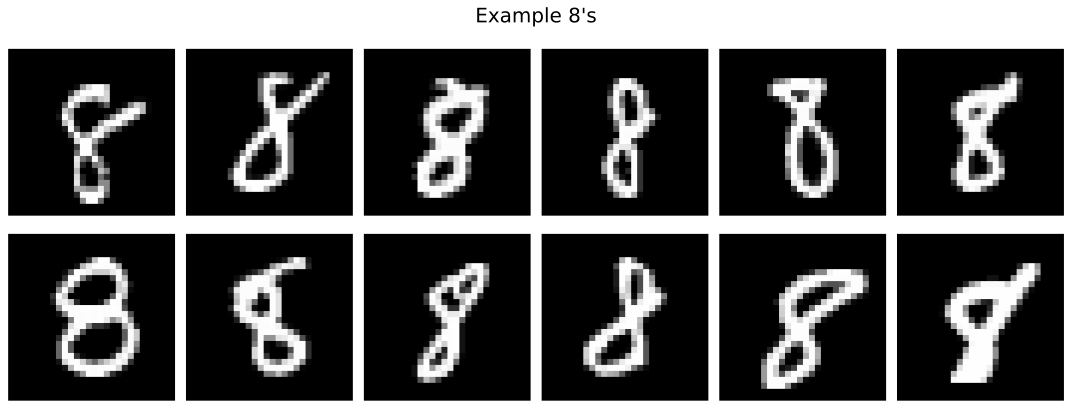

In [13]:
# lets see some example 8s
# find indices of all the 8s in the datasets

the8s = np.where(labels==8)[0]

# draw the first 12
fig,axs = plt.subplots(2,6,figsize=(15,6))

for i,ax in enumerate(axs.flatten()):
  img = np.reshape(data[the8s[i],:],(28,28))
  ax.imshow(img,cmap='gray')
  ax.axis('off')

plt.suptitle("Example 8's",fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

(1912, 784)


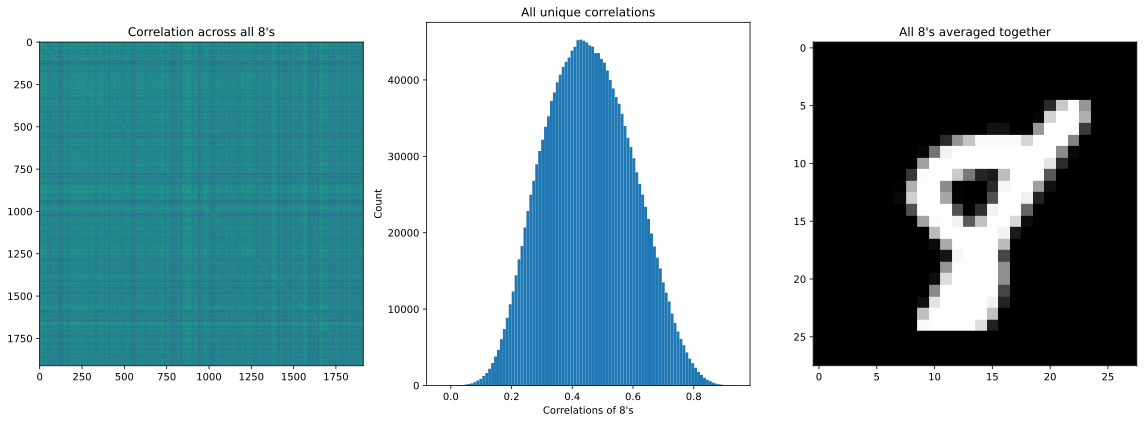

In [14]:
# how similar are all the 7's? 

# how many 7's are there?
print(data[the8s,:].shape)


# let's see how they relate to each other by computing spatial correlations
C = np.corrcoef(data[the8s,:])

# and visualize
fig,ax = plt.subplots(1,3,figsize=(16,6))
ax[0].imshow(C,vmin=0,vmax=1)
ax[0].set_title("Correlation across all 8's")

# extract the unique correlations and show as a scatterplot
uniqueCs = np.triu(C,k=1).flatten()
ax[1].hist(uniqueCs[uniqueCs!=0],bins=100)
ax[1].set_title('All unique correlations')
ax[1].set_xlabel("Correlations of 8's")
ax[1].set_ylabel('Count')

# show all 7's together
aveAll8s = np.reshape( np.mean(data[the8s,:],axis=0) ,(28,28))
ax[2].imshow(img,cmap='gray')
ax[2].set_title("All 8's averaged together")

plt.tight_layout()
plt.show()